In [81]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from math import factorial

random.seed(time.perf_counter())

In [82]:
def generate_main_nodes(mu, sigma, num_points):
    out_array = []
    for i in range(num_points):
        out_array.append(random.gauss(mu, sigma))
    return np.array(out_array)

def generate_outliers(main_data, num_outliers, max_diff, min_diff):
    indices = [int(random.uniform(0, len(main_data) + i - 1)) for i in range(num_outliers)]
    indices.sort()
    indices = np.array(indices)

    max_elem = np.max(main_data)
    min_elem = np.min(main_data)
    
    outliers_final = []
    for i in range(num_outliers):
        outliers = []
        for j in range(num_outliers - i):
            outliers.append(random.uniform(min_diff, max_diff) + max_elem)
        for j in range(i):
            outliers.append(min_elem - random.uniform(min_diff, max_diff))
        outliers_final.append(outliers)

        outliers = []
        for j in range(i):
            outliers.append(random.uniform(min_diff, max_diff) + max_elem)
        for j in range(num_outliers - i):
            outliers.append(min_elem - random.uniform(min_diff, max_diff))
        outliers_final.append(outliers)
    outliers_final = np.array(outliers_final)
    return indices, outliers_final

def generate_data(total_points, num_outliers, mu, sigma, max_diff = 1, min_diff = 0):
    main_data = generate_main_nodes(mu, sigma, total_points - num_outliers)
    indices, outliers = generate_outliers(main_data, num_outliers, max_diff, min_diff)
    return main_data, outliers, indices

def get_data_with_outliers(main_data, outliers, indices):
    result = []
    for i in range(len(outliers)):
        tmp_array = np.copy(main_data).tolist()
        for j in range(len(indices)):
            tmp_array.insert(indices[j] + 1, outliers[i][j])
        result.append(tmp_array)
    return np.array(result)

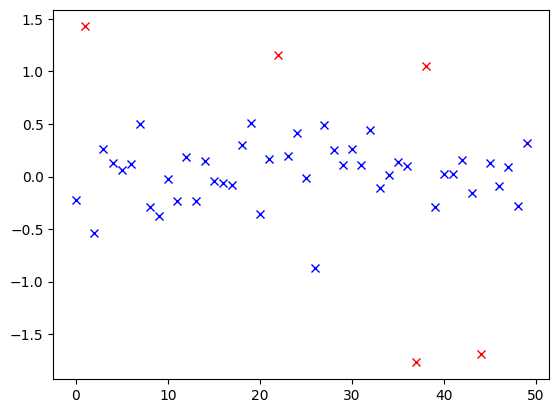

In [85]:
main_data, outliers, indices = generate_data(50, 5, 0, 0.3, 1, 0.5)
data_with_outliers = get_data_with_outliers(main_data, outliers, indices)
for i in range(len(data_with_outliers[4])):
    if (np.isin(data_with_outliers[4][i], outliers)):
        plt.plot(i, data_with_outliers[4][i], color='red', marker='x', linestyle='')
    else:
        plt.plot(i, data_with_outliers[4][i], color='blue', marker='x', linestyle='')